<a href="https://colab.research.google.com/github/22104071/GS_071/blob/main/Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # to ignore warnings

Data Retrival

In [7]:
df = pd.read_csv('/content/accident.csv')

In [8]:
df.head() #To check the first 5 (default) columns of the dataset->dataframe

,Accident_ID,State,Date,Time,Reason,Number_of_Deaths,Number_of_Injuries,Road_Type,Weather_Conditions,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit
0,1001,Andhra Pradesh,2021-05-01,15:30:00,Speeding,2,3,Rural,Sunny,No,No,Poor,60.0
1,1002,Karnataka,2021-05-02,18:45:00,Drunk Driving,1,4,Urban,Rainy,Yes,No,Good,40.0
2,1003,Delhi,2021-05-03,10:15:00,Poor Road Conditions,0,2,Urban,Foggy,No,No,Poor,50.0
3,1004,Maharashtra,2021-05-04,06:00:00,Driver Fatigue,3,6,Rural,Sunny,No,Yes,Good,70.0
4,1005,Uttar Pradesh,2021-05-05,21:20:00,Speeding,1,2,Rural,Sunny,No,No,Fair,80.0


Data Wrangling (Data Cleaning)

In [9]:
df.info() #To check the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Accident_ID         300 non-null    object 
 1   State               300 non-null    object 
 2   Date                300 non-null    object 
 3   Time                300 non-null    object 
 4   Reason              300 non-null    object 
 5   Number_of_Deaths    300 non-null    int64  
 6   Number_of_Injuries  300 non-null    object 
 7   Road_Type           300 non-null    object 
 8   Weather_Conditions  300 non-null    object 
 9   Alcohol_Involved    300 non-null    object 
 10  Driver_Fatigue      300 non-null    object 
 11  Road_Conditions     300 non-null    object 
 12  Speed_Limit         299 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 30.6+ KB


In [10]:
df.describe() #To decribe the basic Statistics

,Number_of_Deaths,Speed_Limit
count,300.000000,299.000000
mean,1.766667,56.989967
std,1.090651,13.042390
min,0.000000,30.000000
25%,1.000000,50.000000
50%,2.000000,60.000000
75%,3.000000,60.000000
max,5.000000,90.000000


In [11]:
df.isna().sum() #To Check NULL Values

Accident_ID           0
State                 0
Date                  0
Time                  0
Reason                0
Number_of_Deaths      0
Number_of_Injuries    0
Road_Type             0
Weather_Conditions    0
Alcohol_Involved      0
Driver_Fatigue        0
Road_Conditions       0
Speed_Limit           1
dtype: int64

In [12]:
df[df.duplicated()] #Empty means no duplicacy

,Accident_ID,State,Date,Time,Reason,Number_of_Deaths,Number_of_Injuries,Road_Type,Weather_Conditions,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit


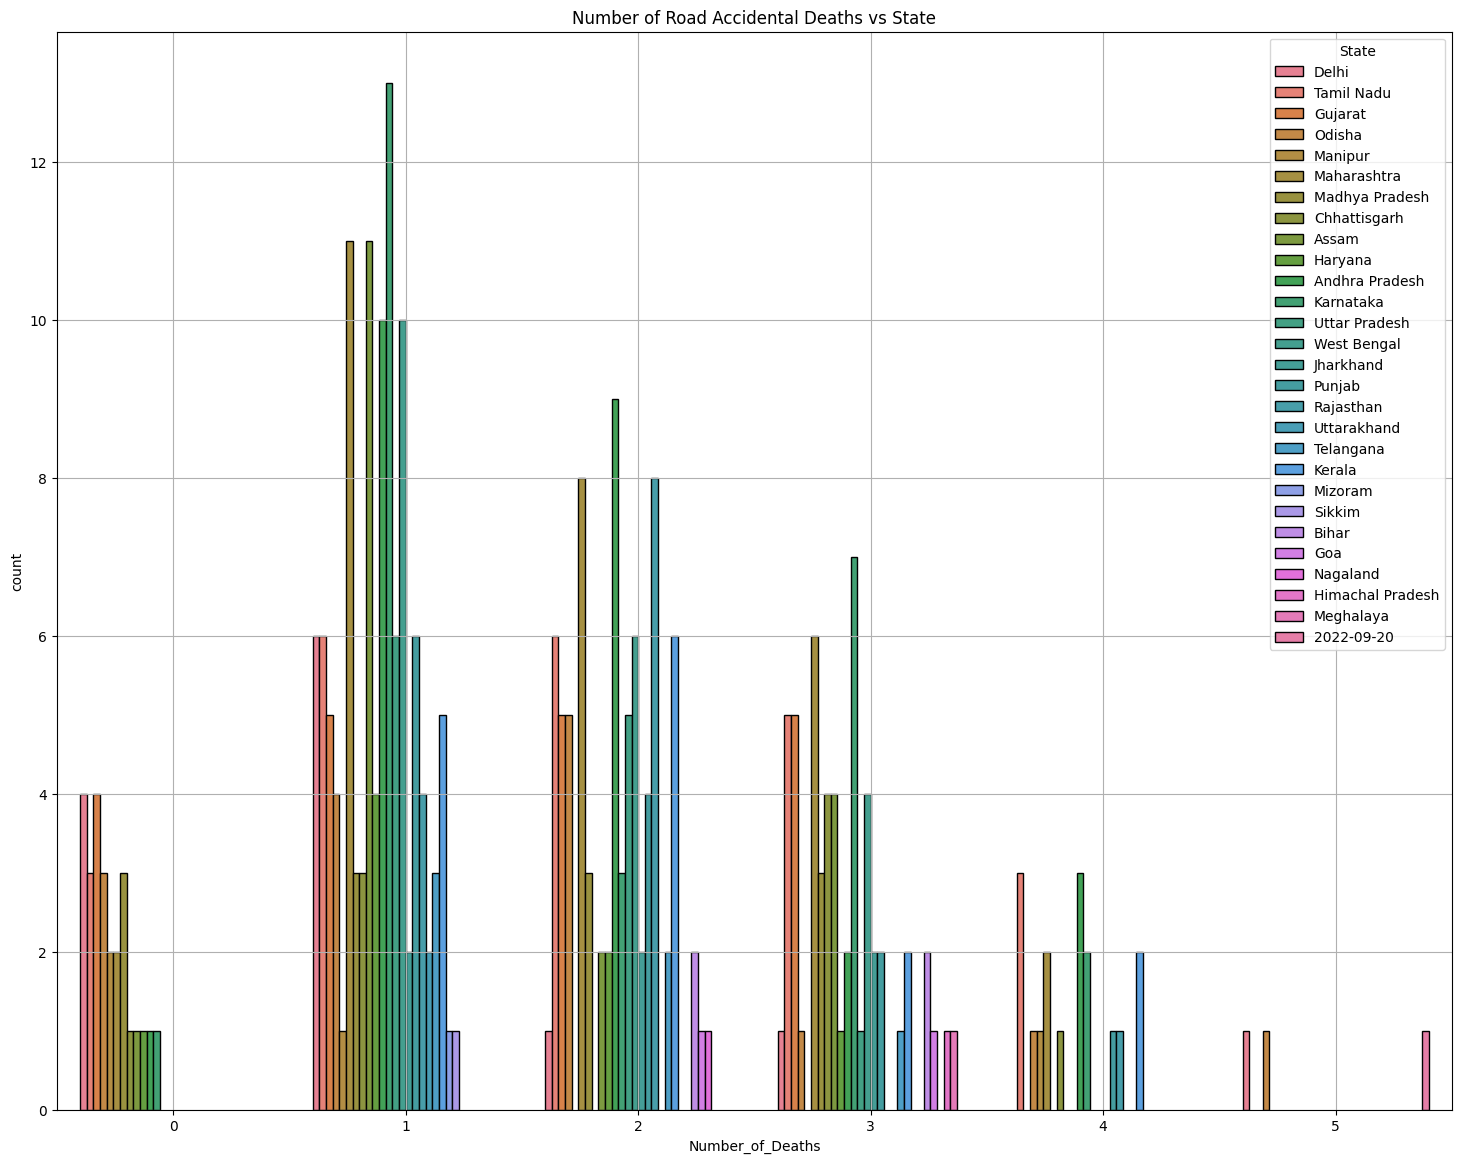

In [13]:
plt.figure(figsize=(18,14))
sns.countplot(x='Number_of_Deaths', data=df,hue='State',edgecolor='black')
plt.grid(True)
plt.title('Number of Road Accidental Deaths vs State')
plt.x_label='State'
plt.y_label='Number of Accidental deaths'

sns.color_palette("Paired")
plt.show()

In [14]:
df.dropna()==True

,Accident_ID,State,Date,Time,Reason,Number_of_Deaths,Number_of_Injuries,Road_Type,Weather_Conditions,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,False,False,False,False,True,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,True,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df[df.isnull()==False]

,Accident_ID,State,Date,Time,Reason,Number_of_Deaths,Number_of_Injuries,Road_Type,Weather_Conditions,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit
0,1001,Andhra Pradesh,2021-05-01,15:30:00,Speeding,2,3,Rural,Sunny,No,No,Poor,60.0
1,1002,Karnataka,2021-05-02,18:45:00,Drunk Driving,1,4,Urban,Rainy,Yes,No,Good,40.0
2,1003,Delhi,2021-05-03,10:15:00,Poor Road Conditions,0,2,Urban,Foggy,No,No,Poor,50.0
3,1004,Maharashtra,2021-05-04,06:00:00,Driver Fatigue,3,6,Rural,Sunny,No,Yes,Good,70.0
4,1005,Uttar Pradesh,2021-05-05,21:20:00,Speeding,1,2,Rural,Sunny,No,No,Fair,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1296,Odisha,2022-04-16,16:30:00,Poor road conditions,1,1,Rural,Sunny,No,Yes,Fair,70.0
296,1297,Karnataka,2022-04-17,08:50:00,Speeding,0,4,Urban,Sunny,No,No,Fair,50.0
297,1298,Andhra Pradesh,2022-04-18,03:00:00,Driver fatigue,1,2,Rural,Sunny,No,Yes,Good,40.0
298,1299,Telangana,2022-04-19,20:10:00,Speeding,3,1,Rural,Snowy,Yes,No,Poor,60.0


In [16]:
df.dropna()
df.isnull().sum()

Accident_ID           0
State                 0
Date                  0
Time                  0
Reason                0
Number_of_Deaths      0
Number_of_Injuries    0
Road_Type             0
Weather_Conditions    0
Alcohol_Involved      0
Driver_Fatigue        0
Road_Conditions       0
Speed_Limit           1
dtype: int64

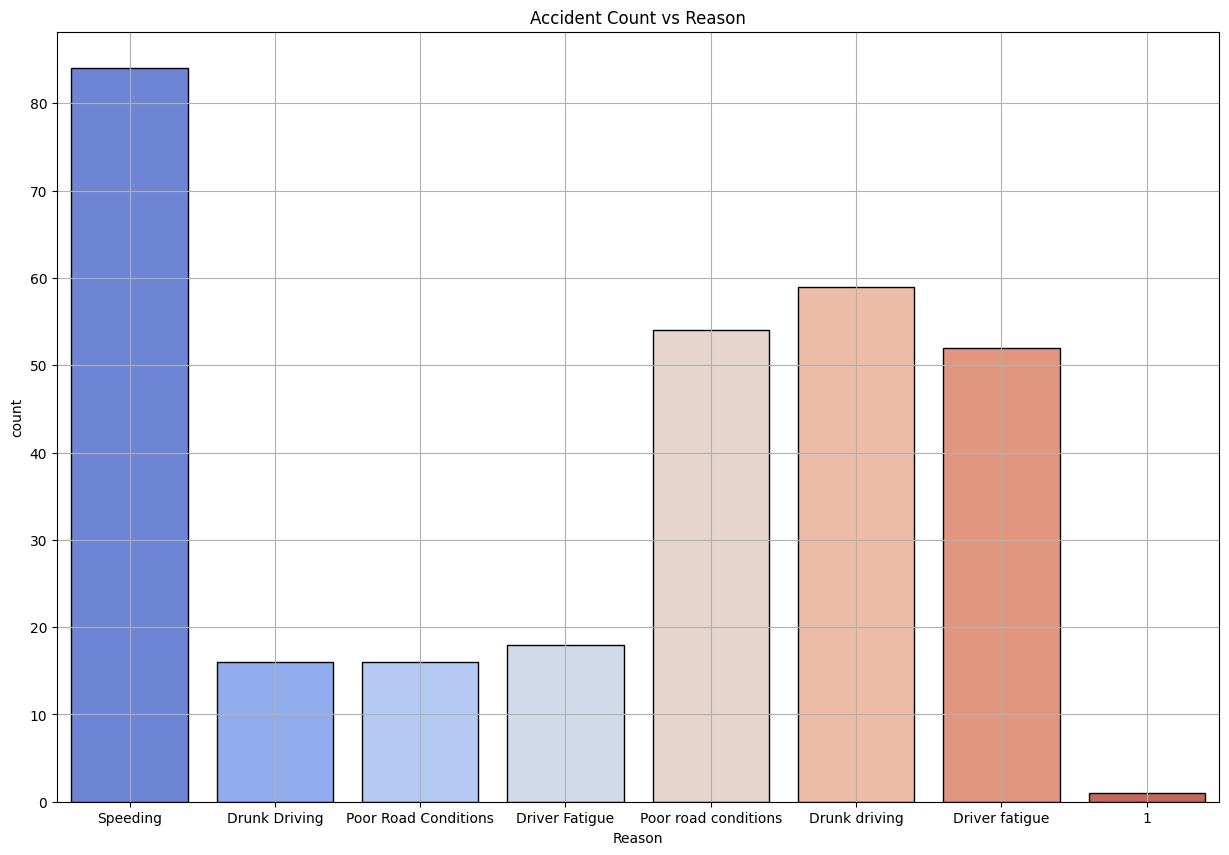

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x='Reason',data=df,palette='coolwarm',edgecolor='black')
plt.y_label='Number of Accidental Deaths'
plt.x_label='Reason'
plt.title('Accident Count vs Reason')
plt.grid(True)
plt.show()

In [18]:
# Find indices of null values
null_indices = np.where(pd.isnull(df))

# Print indices of null values
print(null_indices)

print("Row indices with null values:", null_indices[0])
print("Column indices with null values:", null_indices[1])


(array([167]), array([12]))
Row indices with null values: [167]
Column indices with null values: [12]


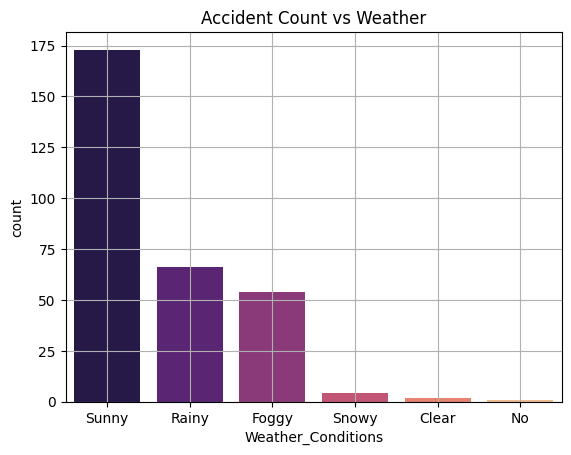

In [19]:
sns.countplot(x='Weather_Conditions',data=df,palette='magma')
plt.title('Accident Count vs Weather')
plt.grid(True)
plt.show()

In [20]:
a = df['Number_of_Deaths'].value_counts()
print(a)



Number_of_Deaths
1    117
2     81
3     56
0     26
4     17
5      3
Name: count, dtype: int64


Text(0, 0.5, 'Count')

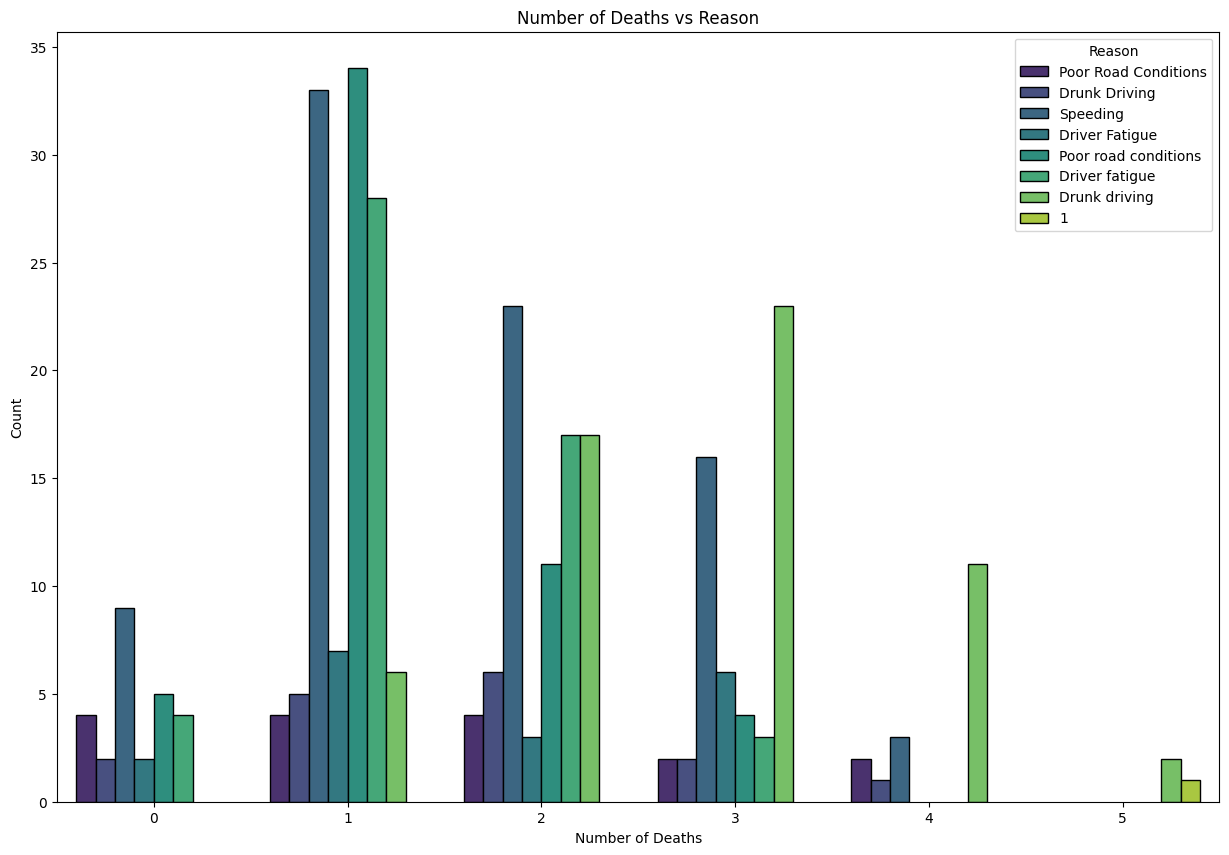

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'df' with a column 'Number_of_Deaths'
groupby='Road_Type'
plt.figure(figsize=(15,10))
sns.countplot(x='Number_of_Deaths', data=df, hue='Reason', palette='viridis', edgecolor='black')
plt.title('Number of Deaths vs Reason')
plt.xlabel('Number of Deaths')
plt.ylabel('Count')




Text(0, 0.5, 'Count')

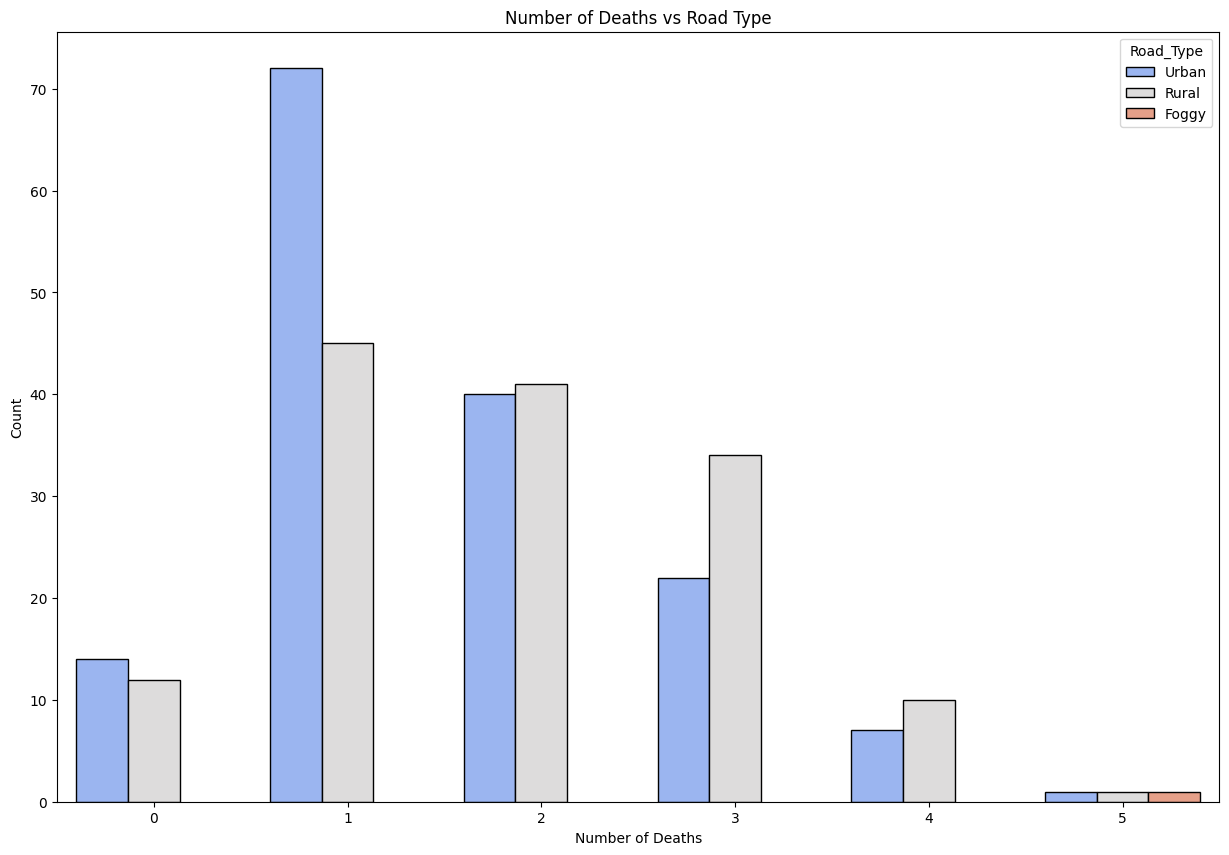

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(x='Number_of_Deaths', data=df, hue='Road_Type', palette='coolwarm', edgecolor='black')
plt.title('Number of Deaths vs Road Type')
plt.xlabel('Number of Deaths')
plt.ylabel('Count')

End